Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


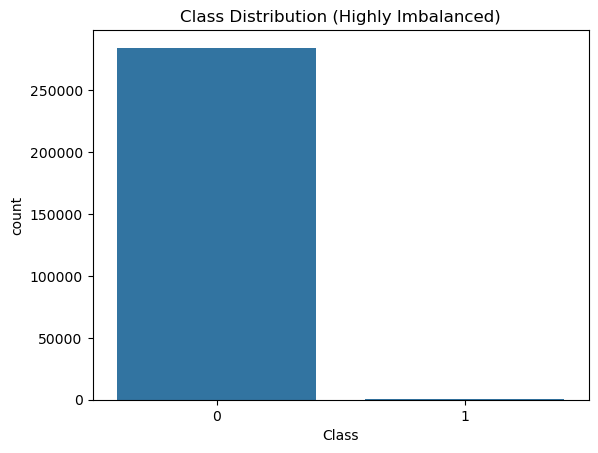

Class weights: {0: 0.5008652375006595, 1: 289.4380081300813}


In [16]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    auc
)
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# ===============================
# 2. LOAD DATASET
# ===============================
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())
# ===============================
# 3. CLASS DISTRIBUTION PLOT
# ===============================
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Highly Imbalanced)")
plt.show()
# ===============================
# 4. FEATURE SCALING
# ===============================
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
# ===============================
# 5. CLASS WEIGHTS (IMBALANCE HANDLING)
# ===============================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)
# ===============================
# 6. DNN MODEL DEFINITION
# ===============================
def create_dnn(input_dim, lr=0.001, dropout=0.4):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(dropout),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout),
        Dense(32, activation='relu'),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model
# ===============================
# 7. EVALUATION FUNCTION
# ===============================
def evaluate_model(model, X_test, y_test, title):
    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob > 0.5).astype(int)
    print(f"\n{title}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    print("ROC-AUC:", roc_auc)
    print("PR-AUC:", pr_auc)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.title("ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    plt.plot(recall, precision)
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    return roc_auc, pr_auc

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7332 - loss: 0.6032
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.2894
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9150 - loss: 0.2537
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9287 - loss: 0.2054
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9384 - loss: 0.1868
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9507 - loss: 0.1840
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9506 - loss: 0.1557
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9539 - loss: 0.1668
Epoch 9/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9565 - loss: 0.1454
Epoch 10/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9551 - loss: 0.1441
Epoch 11/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9536 - loss: 0.1475
Epoch 12/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

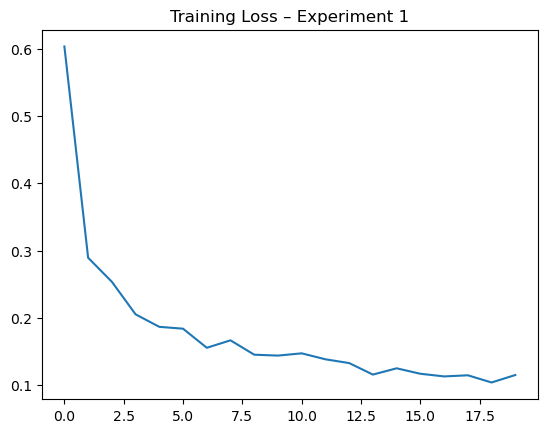

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step

Experiment 1 (80–20)
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



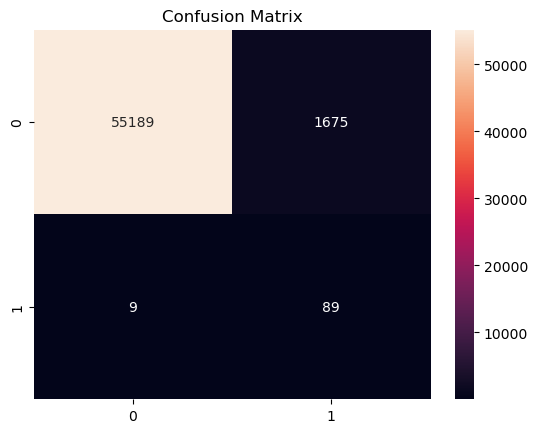

ROC-AUC: 0.9772231346111883
PR-AUC: 0.7266329688475157


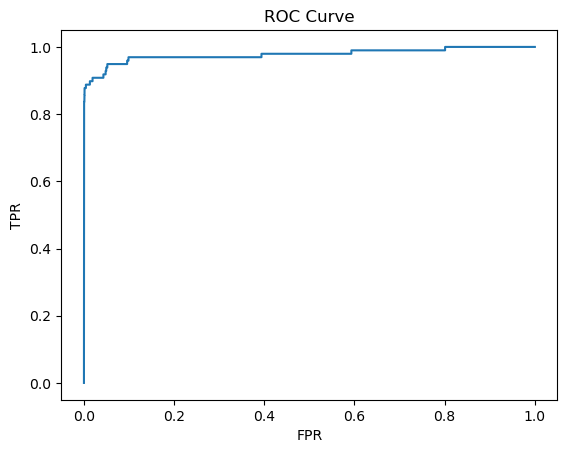

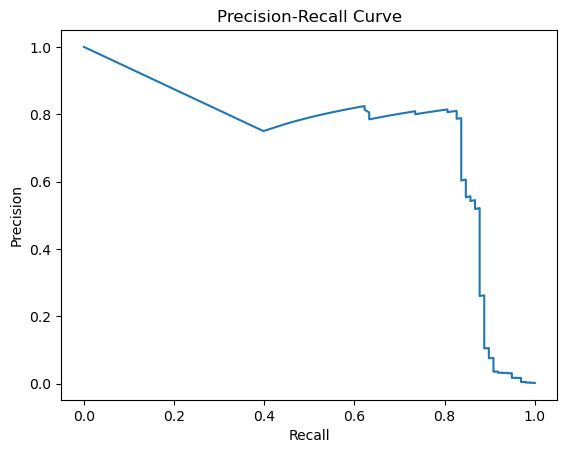

(0.9772231346111883, 0.7266329688475157)

In [18]:
# ===============================
# EXPERIMENT 1: 80–20 SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
model = create_dnn(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    class_weight=class_weight_dict,
    verbose=1
)
plt.plot(history.history['loss'])
plt.title("Training Loss – Experiment 1")
plt.show()
evaluate_model(model, X_test, y_test, "Experiment 1 (80–20)")

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6833 - loss: 0.4998
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3074
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9197 - loss: 0.2633
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9354 - loss: 0.2013
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9464 - loss: 0.1939
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9501 - loss: 0.1874
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9566 - loss: 0.1824
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9542 - loss: 0.1607
Epoch 9/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9589 - loss: 0.1513
Epoch 10/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9605 - loss: 0.1370
Epoch 11/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9598 - loss: 0.1497
Epoch 12/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9622 - loss: 0.1328


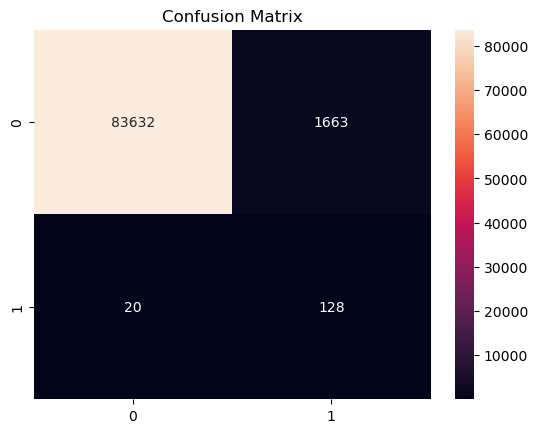

ROC-AUC: 0.9780368371771736
PR-AUC: 0.7275152454232513


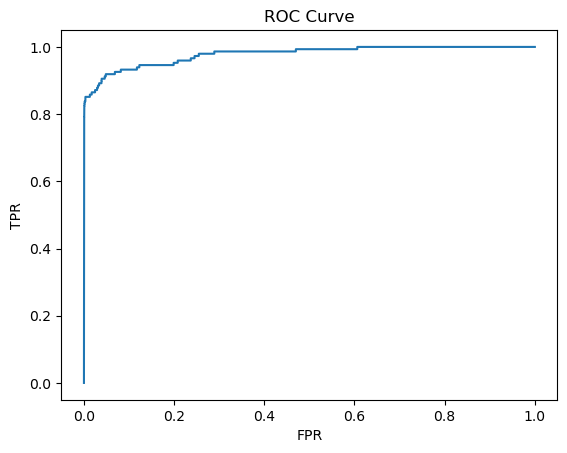

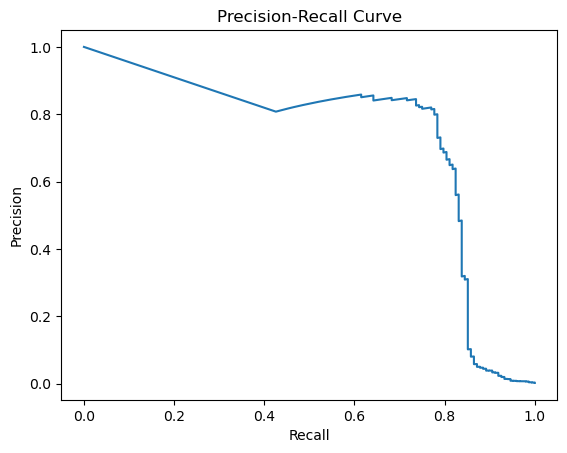

(0.9780368371771736, 0.7275152454232513)

In [20]:
# ===============================
# EXPERIMENT 2: 70–30 SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
model = create_dnn(X_train.shape[1])
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=2048,
    class_weight=class_weight_dict,
    verbose=1
)
evaluate_model(model, X_test, y_test, "Experiment 2 (70–30)")

Epoch 1/30


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6319 - loss: 0.5401 - val_accuracy: 0.9787 - val_loss: 0.3714
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8537 - loss: 0.2862 - val_accuracy: 0.9890 - val_loss: 0.1586
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.2225 - val_accuracy: 0.9893 - val_loss: 0.1004
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9384 - loss: 0.2213 - val_accuracy: 0.9821 - val_loss: 0.0873
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9426 - loss: 0.2253 - val_accuracy: 0.9800 - val_loss: 0.0874
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.2003 - val_accuracy: 0.9772 - val_loss: 0.0884
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9424 - loss: 0.1737 - val_accuracy: 0.9789 - val_loss: 0.0786
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9557 - loss: 0.1373 - val_accuracy: 0.9788 - val_loss: 0.0743
Epo

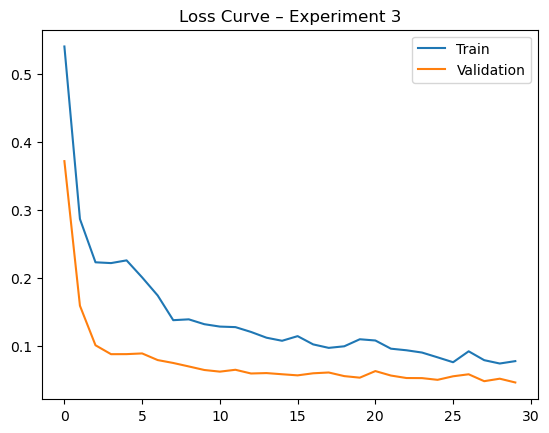

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step

Experiment 3 (60–20–20)
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



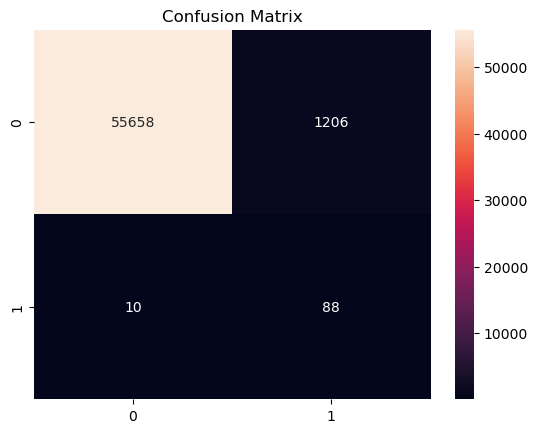

ROC-AUC: 0.980905389730456
PR-AUC: 0.7466291907160576


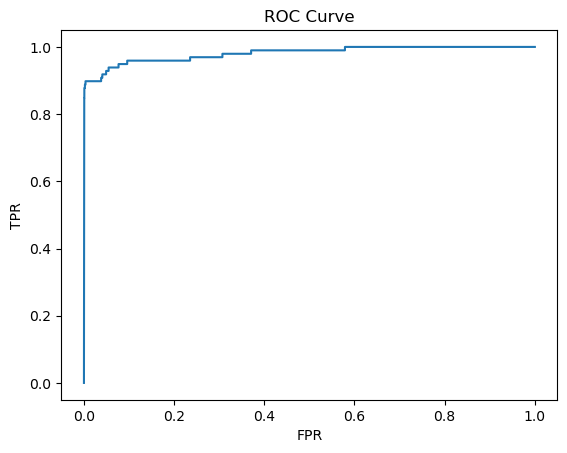

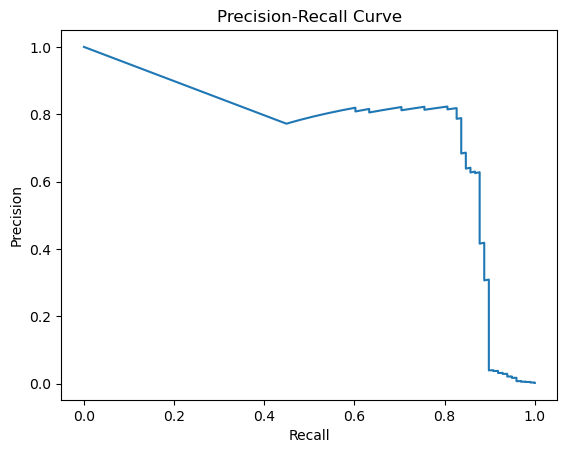

(0.980905389730456, 0.7466291907160576)

In [22]:
# ===============================
# EXPERIMENT 3: 60–20–20 SPLIT
# ===============================
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model = create_dnn(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=2048,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title("Loss Curve – Experiment 3")
plt.show()
evaluate_model(model, X_test, y_test, "Experiment 3 (60–20–20)")

Epoch 1/30


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6196 - loss: 0.6101 - val_accuracy: 0.9472 - val_loss: 0.4351
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8283 - loss: 0.3351 - val_accuracy: 0.9774 - val_loss: 0.2159
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9005 - loss: 0.2491 - val_accuracy: 0.9824 - val_loss: 0.1374
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step

Experiment 4 (70–15–15)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     42648
           1       0.03      0.88      0.05        74

    accuracy                           0.95     42722
   macro avg       0.51      0.91      0.51     42722
weighted avg       1.00      0.95      0.97     42722



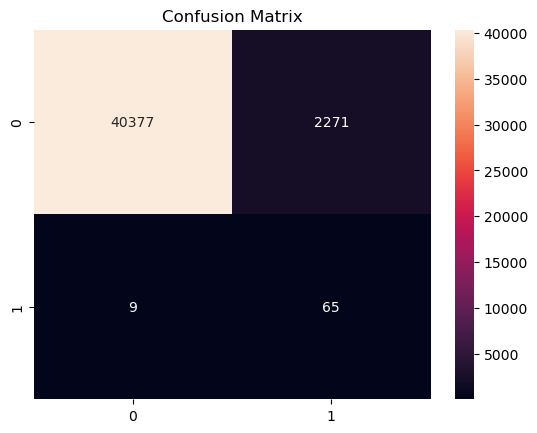

ROC-AUC: 0.9589117641839927
PR-AUC: 0.6047944735921319


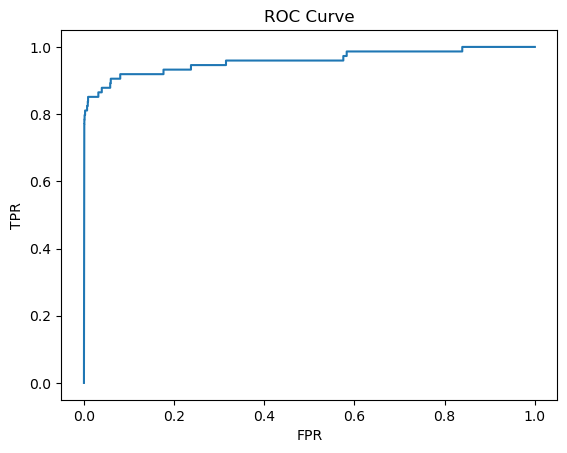

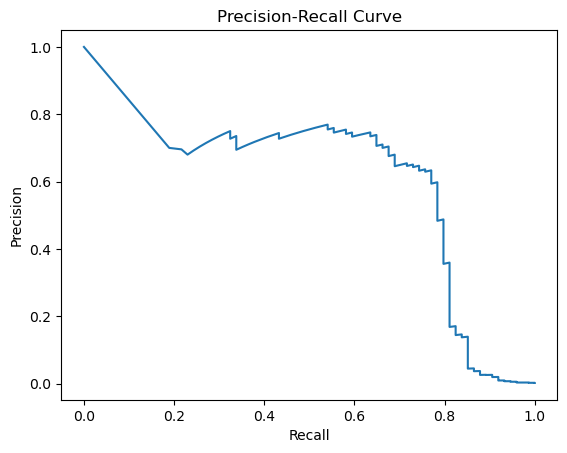

(0.9589117641839927, 0.6047944735921319)

In [24]:
# ===============================
# EXPERIMENT 4: 70–15–15 SPLIT
# ===============================
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
)
model = create_dnn(X_train.shape[1])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=2048,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)
evaluate_model(model, X_test, y_test, "Experiment 4 (70–15–15)")

In [26]:
# ===============================
# 8. 5-FOLD STRATIFIED CROSS-VALIDATION
# ===============================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_scores = []
pr_scores = []
for train_idx, test_idx in skf.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    model = create_dnn(X_tr.shape[1])
    model.fit(
        X_tr, y_tr,
        epochs=10,
        batch_size=2048,
        class_weight=class_weight_dict,
        verbose=0
    )
    y_prob = model.predict(X_te).ravel()
    roc_scores.append(roc_auc_score(y_te, y_prob))
    p, r, _ = precision_recall_curve(y_te, y_prob)
    pr_scores.append(auc(r, p))
print("\n5-Fold Cross-Validation Results")
print("Mean ROC-AUC:", np.mean(roc_scores))
print("Std ROC-AUC:", np.std(roc_scores))
print("Mean PR-AUC:", np.mean(pr_scores))
print("Std PR-AUC:", np.std(pr_scores))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step

5-Fold Cross-Validation Results
Mean ROC-AUC: 0.9816728080536332
Std ROC-AUC: 0.0038706757440651824
Mean PR-AUC: 0.7726410863866355
Std PR-AUC: 0.025338009989758124
